<a href="https://colab.research.google.com/github/phuongha47/vinmec_pre/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read data

In [ ]:
pip install underthesea

In [ ]:
import pandas as pd
import re
from underthesea import sent_tokenize

In [ ]:
df_train = pd.read_csv(r'/content/drive/MyDrive/QA_KLTN/Dataset/Data_preprocess/Data merged/train.csv')
df_test = pd.read_csv(r'/content/drive/MyDrive/QA_KLTN/Dataset/Data_preprocess/Data merged/test.csv')
df_val = pd.read_csv(r'/content/drive/MyDrive/QA_KLTN/Dataset/Data_preprocess/Data merged/val.csv')


In [ ]:
s1 = u'ÀÁÂÃÈÉÊÌÍÒÓÔÕÙÚÝàáâãèéêìíòóôõùúýĂăĐđĨĩŨũƠơƯưẠạẢảẤấẦầẨẩẪẫẬậẮắẰằẲẳẴẵẶặẸẹẺẻẼẽẾếỀềỂểỄễỆệỈỉỊịỌọỎỏỐốỒồỔổỖỗỘộỚớỜờỞởỠỡỢợỤụỦủỨứỪừỬửỮữỰựỲỳỴỵỶỷỸỹ'
s0 = u'AAAAEEEIIOOOOUUYaaaaeeeiioooouuyAaDdIiUuOoUuAaAaAaAaAaAaAaAaAaAaAaAaEeEeEeEeEeEeEeEeIiIiOoOoOoOoOoOoOoOoOoOoOoOoUuUuUuUuUuUuUuYyYyYyYy'
def remove_accents(text):
	for c in text:
		if c in s1:
			 text = text.replace(c,s0[s1.index(c)])
	return text

In [ ]:
# for i in range(len(df_train["long_question"])):
#   try: 
#     df_train["long_question"][i] = remove_accents(df_train["long_question"][i])
#   except:
#     print ('') 
# for i in range(len(df_train["answer"])):
#   try: 
#     df_train["answer"][i] = remove_accents(df_train["answer"][i])
#   except:
#     print ('') 

# Data understand

## Size 

In [ ]:
print('Size TRAIN:', len(df_train))
print('Size TEST:', len(df_test))
print('Size VAL:', len(df_val))

Size TRAIN: 8201
Size TEST: 1025
Size VAL: 1016


## Document statistics by number of sentences

### Answer

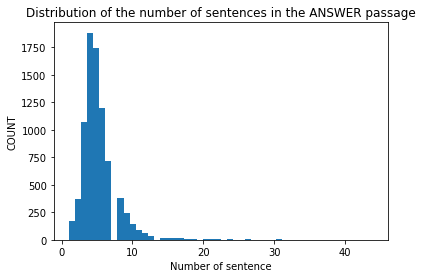

In [ ]:
import matplotlib.pyplot as plt

plt.hist([len(sent_tokenize(s)) for s in df_train['answer']], 50)
plt.xlabel('Number of sentence')
plt.ylabel('COUNT')
plt.title('Distribution of the number of sentences in the ANSWER passage')
plt.show()

In [ ]:
sen5 = sen10 = sen15 = sen20 = 0
for text in df_train['answer']:
  if len(sent_tokenize(text)) < 5:
    sen5 += 1
  elif len(sent_tokenize(text)) >= 5 and len(sent_tokenize(text)) < 10:
    sen10 += 1
  elif len(sent_tokenize(text)) >= 10 and len(sent_tokenize(text)) < 15:
    sen15 += 1
  else:
    sen20 += 1

In [ ]:
from tabulate import tabulate

leng = len(df_train)
print(tabulate([['<5', sen5], ['[5:10)', sen10], ['[10:15)', sen15], ['[15:~)', sen20]], headers=['Sentences', 'Count']))

Sentences      Count
-----------  -------
<5              3491
[5:10)          4273
[10:15)          348
[15:~)            89


In [ ]:
print(tabulate([['<5', sen5/leng*100], ['[5:10)', sen10/leng*100], ['[10:15)', sen15/leng*100], ['[15:~)', sen20/leng*100]], headers=['Sentences', 'Count']))

Sentences       Count
-----------  --------
<5           42.568
[5:10)       52.1034
[10:15)       4.24338
[15:~)        1.08523


### Long question


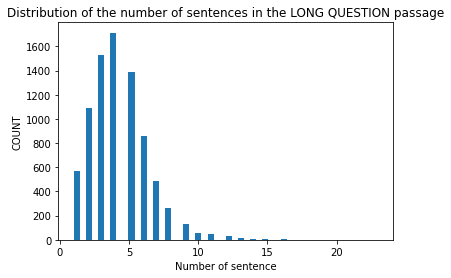

In [ ]:
import matplotlib.pyplot as plt

plt.hist([len(sent_tokenize(s)) for s in df_train['long_question']], 50)
plt.xlabel('Number of sentence')
plt.ylabel('COUNT')
plt.title('Distribution of the number of sentences in the LONG QUESTION passage')
plt.show()

In [ ]:
sen5 = sen10 = sen15 = sen20 = 0
for text in df_train['long_question']:
  if len(sent_tokenize(text)) < 5:
    sen5 += 1
  elif len(sent_tokenize(text)) >= 5 and len(sent_tokenize(text)) < 10:
    sen10 += 1
  elif len(sent_tokenize(text)) >= 10 and len(sent_tokenize(text)) < 15:
    sen15 += 1
  else:
    sen20 += 1

In [ ]:
print(tabulate([['<5', sen5], ['[5:10)', sen10], ['[10:15)', sen15], ['[15:~)', sen20]], headers=['Sentences', 'Count']))

Sentences      Count
-----------  -------
<5              4905
[5:10)          3131
[10:15)          152
[15:~)            13


In [ ]:
print(tabulate([['<5', sen5/leng*100], ['[5:10)', sen10/leng*100], ['[10:15)', sen15/leng*100], ['[15:~)', sen20/leng*100]], headers=['Sentences', 'Count']))

Sentences        Count
-----------  ---------
<5           59.8098
[5:10)       38.1783
[10:15)       1.85343
[15:~)        0.158517


## Number of documents by word length

### Answer

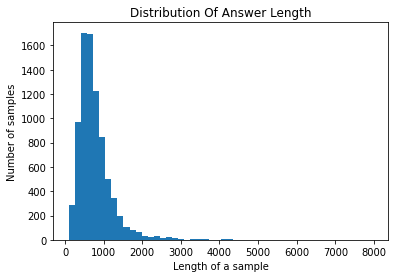

In [ ]:
import matplotlib.pyplot as plt

plt.hist([len(str(s)) for s in df_train['answer']], 50)
plt.xlabel('Length of a sample')
plt.ylabel('Number of samples')
plt.title('Distribution Of Answer Length')
plt.show()

In [ ]:
count100 = count300 = count500 = count700 = count1000 = count10000 = 0
for s in df_train['answer']:
  if (len(str(s)) < 100):
    count100 += 1
  elif (len(str(s)) >= 100 and len(str(s)) < 300):
    count300 += 1
  elif (len(str(s)) >= 300 and len(str(s)) < 500):
    count500 += 1
  elif (len(str(s)) >= 500 and len(str(s)) < 700):
    count700 += 1
  elif (len(str(s)) >= 700 and len(str(s)) < 1000):
    count1000 += 1
  else:
    count10000 += 1

In [ ]:
leng = len(df_train)
print(tabulate([['<100', count100], ['[100:300)', count300], ['[300:500)', count500], ['[500:700)', count700], ['[700:1000)', count1000], ['[1000:~)', count10000]], headers=['Length', 'Count']))

Length        Count
----------  -------
<100              1
[100:300)       504
[300:500)      1668
[500:700)      2229
[700:1000)     2127
[1000:~)       1672


In [ ]:
print(tabulate([['<100', round(count100/leng*100, 2)], ['[100:300)', round(count300/leng*100, 2)], ['[300:500)', round(count500/leng*100, 2)], ['[500:700)', round(count700/leng*100, 2)], ['[700:1000)', round(count1000/leng*100, 2)], ['[1000:~)', round(count10000/leng*100, 2)]], headers=['Length', '%']))

Length          %
----------  -----
<100         0.01
[100:300)    6.15
[300:500)   20.34
[500:700)   27.18
[700:1000)  25.94
[1000:~)    20.39


### Long question

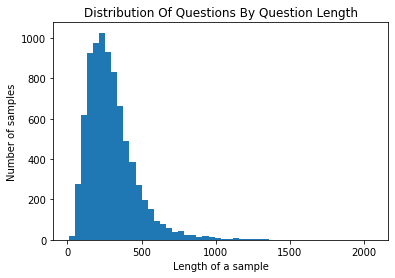

In [ ]:
import matplotlib.pyplot as plt

plt.hist([len(str(s)) for s in df_train['long_question']], 50)
plt.xlabel('Length of a sample')
plt.ylabel('Number of samples')
plt.title('Distribution Of Questions By Question Length')
plt.show()

In [ ]:
count100 = count300 = count500 = count700 = count1000 = count10000 = 0
for s in df_train['long_question']:
  if (len(str(s)) < 100):
    count100 += 1
  elif (len(str(s)) > 100 and len(str(s)) < 300):
    count300 += 1
  elif (len(str(s)) > 300 and len(str(s)) < 500):
    count500 += 1
  elif (len(str(s)) > 500 and len(str(s)) < 700):
    count700 += 1
  elif (len(str(s)) > 700 and len(str(s)) < 1000):
    count1000 += 1
  else:
    count10000 += 1

In [ ]:
print(tabulate([['<100', count100], ['[100:300)', count300], ['[300:500)', count500], ['[500:700)', count700], ['[700:1000)', count1000], ['[1000:~)', count10000]], headers=['Length', 'Count']))

Length        Count
----------  -------
<100            396
[100:300)      4443
[300:500)      2522
[500:700)       568
[700:1000)      184
[1000:~)         88


In [ ]:
print(tabulate([['<100', round(count100/leng*100, 2)], ['[100:300)', round(count300/leng*100, 2)], ['[300:500)', round(count500/leng*100, 2)], ['[500:700)', round(count700/leng*100, 2)], ['[700:1000)', round(count1000/leng*100, 2)], ['[1000:~)', round(count10000/leng*100, 2)]], headers=['Length', '%']))

Length          %
----------  -----
<100         4.83
[100:300)   54.18
[300:500)   30.75
[500:700)    6.93
[700:1000)   2.24
[1000:~)     1.07


# Preprocessing

In [ ]:
# train
for i in range(len(df_train)):
  begin = 0
  end = 0
  if (type(df_train['answer'][i])== str):
    for j in range(len(df_train['answer'][i])):
        if df_train['answer'][i][j] == '“':
          begin = j
        if df_train['answer'][i][j] == '”':
          end = j
    if begin!=0 and end!=0:
      df_train['answer'][i] = df_train['answer'][i].replace(df_train['answer'][i][begin:end+2],"")


In [ ]:
# test
for i in range(len(df_test)):
  begin = 0
  end = 0
  if (type(df_test['answer'][i])== str):
    for j in range(len(df_test['answer'][i])):
        if df_test['answer'][i][j] == '“':
          begin = j
        if df_test['answer'][i][j] == '”':
          end = j
    if begin!=0 and end!=0:
      df_test['answer'][i] = df_test['answer'][i].replace(df_test['answer'][i][begin:end+2],"")

In [ ]:
# val
for i in range(len(df_val)):
  begin = 0
  end = 0
  if (type(df_val['answer'][i])== str):
    for j in range(len(df_val['answer'][i])):
        if df_val['answer'][i][j] == '“':
          begin = j
        if df_val['answer'][i][j] == '”':
          end = j
    if begin!=0 and end!=0:
      df_val['answer'][i] = df_val['answer'][i].replace(df_val['answer'][i][begin:end+2],"")

In [ ]:
df_train = df_train[df_train.answer != 'None']
df_train = df_train[df_train.answer != 'none']
df_train = df_train[df_train.answer != ' ']
df_train = df_train[df_train.answer != '']

df_test = df_test[df_test.answer != 'None']
df_test = df_test[df_test.answer != 'none']
df_test = df_test[df_test.answer != ' ']
df_test = df_test[df_test.answer != '']

df_val = df_val[df_val.answer != 'None']
df_val = df_val[df_val.answer != 'none']
df_val = df_val[df_val.answer != ' ']
df_val = df_val[df_val.answer != '']

In [ ]:
df_train.tail()

,short_question,long_question,answer,link
8196,None,Tôi vừa chích ngừa Vaccine Covid-19 thì 10 ngà...,Chào chị \nTheo khuyến cáo của Tổ chức Y tế Th...,https://vnexpress.net/tu-van-tiem-vaccine-covi...
8197,None,"Tôi bị nhịp xoang chậm, khoảng 6 tháng đến một...","Chào chị, Với tiền sử bệnh lý về tim mạch, chị...",https://vnexpress.net/tu-van-tiem-vaccine-covi...
8198,None,VNVC đã có vaccine Pfizer hay Moderna chưa ạ?,"Chào anh, chị Theo thông tin từ Bộ Y tế, hơn 9...",https://vnexpress.net/tu-van-tiem-vaccine-covi...
8199,None,"Tôi bị bệnh hen suyễn, hiện đang phải uống thu...","Chào Anh/Chị,\nAnh/Chị có tiền sử hen phế quản...",https://vnexpress.net/tu-van-tiem-vaccine-covi...
8200,None,"Tôi năm nay 41 tuổi, đi khám bệnh viên tim đượ...",Chào anh \nAnh có nhịp nhanh kịch phát trên th...,https://vnexpress.net/tu-van-tiem-vaccine-covi...


In [ ]:
# train
for i in range(len(df_train)):
  # short_question
  df_train['short_question'][i] = df_train['short_question'][i].strip()
  df_train['short_question'][i] = df_train['short_question'][i].lower()
  df_train['short_question'][i] = df_train['short_question'][i].replace("\n", "")
  df_train['short_question'][i] = re.sub(r'[^\w\s]','', df_train['short_question'][i])
  # long_question
  df_train['long_question'][i] = df_train['long_question'][i].strip()
  df_train['long_question'][i] = df_train['long_question'][i].lower()
  df_train['long_question'][i] = df_train['long_question'][i].replace("\n", "")
  df_train['long_question'][i] = re.sub(r'[^\w\s]','', df_train['long_question'][i])
  # answer
  df_train['answer'][i] = df_train['answer'][i].strip()
  df_train['answer'][i] = df_train['answer'][i].lower()
  df_train['answer'][i] = df_train['answer'][i].replace("\n", "")
  df_train['answer'][i] = re.sub(r'[^\w\s]','', df_train['answer'][i])


# val
for i in range(len(df_val)):
  # short_question
  df_val['short_question'][i] = df_val['short_question'][i].strip()
  df_val['short_question'][i] = df_val['short_question'][i].lower()
  df_val['short_question'][i] = df_val['short_question'][i].replace("\n", "")
  df_val['short_question'][i] = re.sub(r'[^\w\s]','', df_val['short_question'][i])
  # long_question
  df_val['long_question'][i] = df_val['long_question'][i].strip()
  df_val['long_question'][i] = df_val['long_question'][i].lower()
  df_val['long_question'][i] = df_val['long_question'][i].replace("\n", "")
  df_val['long_question'][i] = re.sub(r'[^\w\s]','', df_val['long_question'][i])
  # answer
  df_val['answer'][i] = df_val['answer'][i].strip()
  df_val['answer'][i] = df_val['answer'][i].lower()
  df_val['answer'][i] = df_val['answer'][i].replace("\n", "")
  df_val['answer'][i] = re.sub(r'[^\w\s]','', df_val['answer'][i])



In [ ]:
# test
for i in range(len(df_test)):
  # short_question
  df_test['short_question'][i] = df_test['short_question'][i].strip()
  df_test['short_question'][i] = df_test['short_question'][i].lower()
  df_test['short_question'][i] = df_test['short_question'][i].replace("\n", "")
  df_test['short_question'][i] = re.sub(r'[^\w\s]','', df_test['short_question'][i])
  # long_question
  df_test['long_question'][i] = df_test['long_question'][i].strip()
  df_test['long_question'][i] = df_test['long_question'][i].lower()
  df_test['long_question'][i] = df_test['long_question'][i].replace("\n", "")
  df_test['long_question'][i] = re.sub(r'[^\w\s]','', df_test['long_question'][i])
  # answer
  df_test['answer'][i] = df_test['answer'][i].strip()
  df_test['answer'][i] = df_test['answer'][i].lower()
  df_test['answer'][i] = df_test['answer'][i].replace("\n", "")
  df_test['answer'][i] = re.sub(r'[^\w\s]','', df_test['answer'][i])

In [ ]:
df_train = df_train.dropna()
df_train = df_train.drop_duplicates()
df_test = df_test.dropna()
df_test = df_test.drop_duplicates()
df_val = df_val.dropna()
df_val = df_val.drop_duplicates()

In [ ]:
len(df_train)

8196

### Tokenize

In [ ]:
pip install pyvi


In [ ]:
from pyvi import ViTokenizer
# train
df_train["long_tokenize"] = ""
df_train["answer_tokenize"] = ""
for i in range(len(df_train["long_question"])):
  try:
    df_train["long_tokenize"][i] = ViTokenizer.tokenize(str(df_train["long_question"][i]))
  except:
    print('..')
for i in range(len(df_train["answer"])):
  try:
    df_train["answer_tokenize"][i] = ViTokenizer.tokenize(str(df_train["answer"][i]))
  except:
    print('..')

..
..
..
..
..
..
..
..
..
..


In [ ]:
from pyvi import ViTokenizer
# val
df_val["long_tokenize"] = ""
df_val["answer_tokenize"] = ""
for i in range(len(df_val["long_question"])):
  try:
    df_val["long_tokenize"][i] = ViTokenizer.tokenize(str(df_val["long_question"][i]))
  except:
    print('..')
for i in range(len(df_val["answer"])):
  try:
    df_val["answer_tokenize"][i] = ViTokenizer.tokenize(str(df_val["answer"][i]))
  except:
    print('..')

In [ ]:
from pyvi import ViTokenizer
# test
df_test["long_tokenize"] = ""
df_test["answer_tokenize"] = ""
for i in range(len(df_test["long_question"])):
  try:
    df_test["long_tokenize"][i] = ViTokenizer.tokenize(str(df_test["long_question"][i]))
  except:
    print('..')
for i in range(len(df_test["answer"])):
  try:
    df_test["answer_tokenize"][i] = ViTokenizer.tokenize(str(df_test["answer"][i]))
  except:
    print('..')

In [ ]:
df_train

,short_question,long_question,answer,link,long_tokenize,answer_tokenize
0,thường xuyên co giật sau khi sử dụng rượu bia ...,chào bác sĩ em năm nay 25 tuổi em bị co giật...,chào em rượu là một chất kích thích tác động t...,https://www.vinmec.com/vi/tin-tuc/hoi-dap-bac-...,chào bác_sĩ em năm nay 25 tuổi em bị co_giật s...,chào em rượu là một chất kích_thích tác_động t...
1,dùng thuốc điều trị thiếu máu do thiếu sắt như...,chào bác sĩlúc trước em bị thiếu máu thiếu sắt...,được giải đáp bởi tiến sĩ bác sĩ trương ngọc h...,https://www.vinmec.com/vi/tin-tuc/hoi-dap-bac-...,chào bác sĩlúc trước em bị thiếu máu thiếu sắt...,được giải_đáp bởi tiến_sĩ bác_sĩ trương ngọc h...
2,thường xuyên đau nhức vùng gáy là biểu hiện củ...,chào bác sĩ dạo gần đây em thường xuyên bị đau...,chào em đau vùng sau gáy không sưng đỏ không đ...,https://www.vinmec.com/vi/tin-tuc/hoi-dap-bac-...,chào bác_sĩ dạo gần đây em thường_xuyên bị đau...,chào em đau vùng sau gáy không sưng đỏ không đ...
3,đã tháo bột điều trị gãy mắt cá ngoài chân 1 t...,chào bác sĩ cách đây 2 tháng em bị gãy mắt cá ...,chào bạn gãy mắt cá chân là một loại tổn thươn...,https://www.vinmec.com/vi/tin-tuc/hoi-dap-bac-...,chào bác_sĩ cách đây 2 tháng em bị gãy mắt_cá ...,chào bạn gãy mắt_cá chân là một loại tổn_thươn...
4,hỏi đáp điều trị sỏi mật bằng phương pháp nội ...,chào bác sĩ tôi muốn hỏi điều trị sỏi mật bằng...,chào bạn điều trị sỏi mật bằng phương pháp nội...,https://www.vinmec.com/vi/tin-tuc/hoi-dap-bac-...,chào bác_sĩ tôi muốn hỏi điều_trị sỏi mật bằng...,chào bạn điều_trị sỏi mật bằng phương_pháp nội...
...,...,...,...,...,...,...
8196,none,tôi vừa chích ngừa vaccine covid19 thì 10 ngày...,chào chị theo khuyến cáo của tổ chức y tế thế ...,https://vnexpress.net/tu-van-tiem-vaccine-covi...,,
8197,none,tôi bị nhịp xoang chậm khoảng 6 tháng đến một ...,chào chị với tiền sử bệnh lý về tim mạch chị v...,https://vnexpress.net/tu-van-tiem-vaccine-covi...,,
8198,none,vnvc đã có vaccine pfizer hay moderna chưa ạ,chào anh chị theo thông tin từ bộ y tế hơn 900...,https://vnexpress.net/tu-van-tiem-vaccine-covi...,,
8199,none,tôi bị bệnh hen suyễn hiện đang phải uống thuố...,chào anhchịanhchị có tiền sử hen phế quản đang...,https://vnexpress.net/tu-van-tiem-vaccine-covi...,,


### Write stopwords list to file

In [ ]:
def get_stopwords(documents, threshold=3):
    """
    :param documents: list of documents
    :param threshold:
    :return: list of words has idf <= threshold
    """
    tfidf = TfidfVectorizer(min_df=5)
    tfidf_matrix = tfidf.fit_transform(documents)
    features = tfidf.get_feature_names()
    stopwords = []
    print(min(tfidf.idf_), max(tfidf.idf_), len(features))
    for index, feature in enumerate(features):
        if tfidf.idf_[index] <= threshold:
            stopwords.append(feature)
    return stopwords

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from nltk.corpus import stopwords

# stopwords = get_stopwords(df_train["long_tokenize"], threshold=3)
# stopwords = stopwords + get_stopwords(df_train["long_question"], threshold=3)
# stopwords = stopwords + get_stopwords(df_train["answer"], threshold=3)
# with open('stopwords.txt', 'w', encoding='utf8') as fp:
#     for word in stopwords:
#         fp.write(word + '\n')

### Read stopword file

In [ ]:
# train
for i in range(len(df_train["long_tokenize"])):
  try:
    df_train["long_tokenize"][i] = df_train["long_tokenize"][i].split(" ")
  except:
    print('ok')
for i in range(len(df_train["answer_tokenize"])):
  try:
    df_train["answer_tokenize"][i] = df_train["answer_tokenize"][i].split(" ")
  except:
    print('ok')

# val
for i in range(len(df_val["long_tokenize"])):
  try:
    df_val["long_tokenize"][i] = df_val["long_tokenize"][i].split(" ")
  except:
    print('ok')
for i in range(len(df_val["answer_tokenize"])):
  try:
    df_val["answer_tokenize"][i] = df_val["answer_tokenize"][i].split(" ")
  except:
    print('ok')

ok
ok
ok
ok
ok
ok
ok
ok
ok
ok


In [ ]:
# test
for i in range(len(df_test["long_tokenize"])):
  try:
    df_test["long_tokenize"][i] = df_test["long_tokenize"][i].split(" ")
  except:
    print('ok')
for i in range(len(df_test["answer_tokenize"])):
  try:
    df_test["answer_tokenize"][i] = df_test["answer_tokenize"][i].split(" ")
  except:
    print('ok')

In [ ]:
with open('/content/drive/MyDrive/QA_KLTN/Dataset/stopwords.txt') as f:
    lines = f.readlines()


In [ ]:
for i in range(len(lines)):
  lines[i] = (lines[i].rstrip("\n"))

In [ ]:
len(lines)

315

### Remove stopwords

In [ ]:
import re
long_tokenize = ''
answer_tokenize = ''
# train
for i in range(len(df_train["long_tokenize"])):
  try:
    for word in df_train["long_tokenize"][i]:
      #remove stopword
      if (word in lines):
        long_tokenize = [word for word in df_train["long_tokenize"][i] if word not in lines]
    df_train["long_tokenize"][i] = long_tokenize
  except: 
    print('err')
for i in range(len(df_train["answer_tokenize"])):
  try:
    for word in df_train["answer_tokenize"][i]:
      #remove stopword
      if (word in lines):
        answer_tokenize = [word for word in df_train["answer_tokenize"][i] if word not in lines]  
    df_train["answer_tokenize"][i] = answer_tokenize 
  except: 
    print('err')


# val
for i in range(len(df_val["long_tokenize"])):
  try:
    for word in df_val["long_tokenize"][i]:
      #remove stopword
      if (word in lines):
        long_tokenize = [word for word in df_val["long_tokenize"][i] if word not in lines]
    df_val["long_tokenize"][i] = long_tokenize
  except: 
    print('err')
for i in range(len(df_val["answer_tokenize"])):
  try:
    for word in df_val["answer_tokenize"][i]:
      #remove stopword
      if (word in lines):
        answer_tokenize = [word for word in df_val["answer_tokenize"][i] if word not in lines]  
    df_val["answer_tokenize"][i] = answer_tokenize 
  except: 
    print('err')

err
err
err
err
err
err
err
err
err
err


In [ ]:
# test
for i in range(len(df_test["long_tokenize"])):
  try:
    for word in df_test["long_tokenize"][i]:
      #remove stopword
      if (word in lines):
        long_tokenize = [word for word in df_test["long_tokenize"][i] if word not in lines]
    df_test["long_tokenize"][i] = long_tokenize
  except: 
    print('err')
for i in range(len(df_test["answer_tokenize"])):
  try:
    for word in df_test["answer_tokenize"][i]:
      #remove stopword
      if (word in lines):
        answer_tokenize = [word for word in df_test["answer_tokenize"][i] if word not in lines]  
    df_test["answer_tokenize"][i] = answer_tokenize 
  except: 
    print('err')

In [ ]:
lines

['bác',
 'bác_sĩ',
 'bệnh',
 'bị',
 'cho',
 'chào',
 'cháu',
 'covid19',
 'có',
 'có_thể',
 'cảm_ơn',
 'của',
 'em',
 'giúp',
 'gì',
 'hay',
 'hỏi',
 'hỏichào',
 'khi',
 'khám',
 'không',
 'là',
 'làm',
 'lại',
 'mong',
 'nay',
 'ngày',
 'nhiều',
 'như',
 'nhưng',
 'nên',
 'năm',
 'phải',
 'rất',
 'sau',
 'thuốc',
 'tháng',
 'thì',
 'tiêm',
 'tuổi',
 'tôi',
 'tư_vấn',
 'uống',
 'vaccine',
 'viêm',
 'và',
 'vậy',
 'xin',
 'đang',
 'đau',
 'đi',
 'điều_trị',
 'đã',
 'được',
 'đến',
 'để',
 'ẩn_danh',
 'bác',
 'bệnh',
 'bị',
 'cho',
 'chào',
 'cháu',
 'covid19',
 'có',
 'cảm',
 'của',
 'danh',
 'em',
 'giúp',
 'gì',
 'hay',
 'hiện',
 'hàng',
 'hỏi',
 'hỏichào',
 'khi',
 'khám',
 'không',
 'là',
 'làm',
 'lại',
 'mong',
 'nay',
 'ngày',
 'nhiều',
 'như',
 'nhưng',
 'nào',
 'nên',
 'năm',
 'phải',
 'rất',
 'sao',
 'sau',
 'sinh',
 'sĩ',
 'thuốc',
 'tháng',
 'thì',
 'thường',
 'thấy',
 'thế',
 'thể',
 'tiêm',
 'trị',
 'tuổi',
 'tôi',
 'tư',
 'uống',
 'vaccine',
 'viêm',
 'và',
 'vấn',
 'vậy'

In [ ]:
df_train.tail()

,short_question,long_question,answer,link,long_tokenize,answer_tokenize
8196,none,tôi vừa chích ngừa vaccine covid19 thì 10 ngày...,chào chị theo khuyến cáo của tổ chức y tế thế ...,https://vnexpress.net/tu-van-tiem-vaccine-covi...,,
8197,none,tôi bị nhịp xoang chậm khoảng 6 tháng đến một ...,chào chị với tiền sử bệnh lý về tim mạch chị v...,https://vnexpress.net/tu-van-tiem-vaccine-covi...,,
8198,none,vnvc đã có vaccine pfizer hay moderna chưa ạ,chào anh chị theo thông tin từ bộ y tế hơn 900...,https://vnexpress.net/tu-van-tiem-vaccine-covi...,,
8199,none,tôi bị bệnh hen suyễn hiện đang phải uống thuố...,chào anhchịanhchị có tiền sử hen phế quản đang...,https://vnexpress.net/tu-van-tiem-vaccine-covi...,,
8200,none,tôi năm nay 41 tuổi đi khám bệnh viên tim được...,chào anh anh có nhịp nhanh kịch phát trên thất...,https://vnexpress.net/tu-van-tiem-vaccine-covi...,,


In [ ]:
# df_train.to_csv(r'/content/drive/MyDrive/QA_KLTN/Dataset/Data_preprocess/Preprocessed data/Preprocessed_val.csv', index=False, header=True)


In [ ]:
df_train

,short_question,long_question,answer,link,long_tokenize,answer_tokenize
0,thường xuyên co giật sau khi sử dụng rượu bia ...,chào bác sĩ em năm nay 25 tuổi em bị co giật...,chào em rượu là một chất kích thích tác động t...,https://www.vinmec.com/vi/tin-tuc/hoi-dap-bac-...,"[25, co_giật, mỗi, bia, rượu, 2, 3, ăn, tái_ph...","[rượu, chất, kích_thích, tác_động, trực_tiếp, ..."
1,dùng thuốc điều trị thiếu máu do thiếu sắt như...,chào bác sĩlúc trước em bị thiếu máu thiếu sắt...,được giải đáp bởi tiến sĩ bác sĩ trương ngọc h...,https://www.vinmec.com/vi/tin-tuc/hoi-dap-bac-...,"[sĩlúc, thiếu, thiếu, sắt, kê, đơn, hemopoly, ...","[giải_đáp, tiến_sĩ, trương, ngọc, hải, hồi_sức..."
2,thường xuyên đau nhức vùng gáy là biểu hiện củ...,chào bác sĩ dạo gần đây em thường xuyên bị đau...,chào em đau vùng sau gáy không sưng đỏ không đ...,https://www.vinmec.com/vi/tin-tuc/hoi-dap-bac-...,"[dạo, gần, đây, thường_xuyên, nhức, vùng, gáy,...","[vùng, gáy, sưng, đỏ, liên_tục, từng, đợt, một..."
3,đã tháo bột điều trị gãy mắt cá ngoài chân 1 t...,chào bác sĩ cách đây 2 tháng em bị gãy mắt cá ...,chào bạn gãy mắt cá chân là một loại tổn thươn...,https://www.vinmec.com/vi/tin-tuc/hoi-dap-bac-...,"[cách, đây, 2, gãy, mắt_cá, chân, trái, phẫu_t...","[gãy, mắt_cá, chân, tổn_thương, xương, mức_độ,..."
4,hỏi đáp điều trị sỏi mật bằng phương pháp nội ...,chào bác sĩ tôi muốn hỏi điều trị sỏi mật bằng...,chào bạn điều trị sỏi mật bằng phương pháp nội...,https://www.vinmec.com/vi/tin-tuc/hoi-dap-bac-...,"[muốn, sỏi, mật, bằng, phương_pháp, nội_soi, ố...","[sỏi, mật, bằng, phương_pháp, nội_soi, ống, mề..."
...,...,...,...,...,...,...
8196,none,tôi vừa chích ngừa vaccine covid19 thì 10 ngày...,chào chị theo khuyến cáo của tổ chức y tế thế ...,https://vnexpress.net/tu-van-tiem-vaccine-covi...,,
8197,none,tôi bị nhịp xoang chậm khoảng 6 tháng đến một ...,chào chị với tiền sử bệnh lý về tim mạch chị v...,https://vnexpress.net/tu-van-tiem-vaccine-covi...,,
8198,none,vnvc đã có vaccine pfizer hay moderna chưa ạ,chào anh chị theo thông tin từ bộ y tế hơn 900...,https://vnexpress.net/tu-van-tiem-vaccine-covi...,,
8199,none,tôi bị bệnh hen suyễn hiện đang phải uống thuố...,chào anhchịanhchị có tiền sử hen phế quản đang...,https://vnexpress.net/tu-van-tiem-vaccine-covi...,,


# Data visualization

### Word_cloudcloud

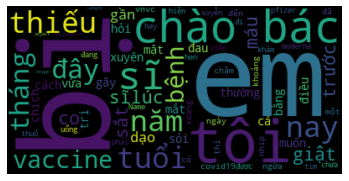

In [ ]:
# Start with one review:
from wordcloud import WordCloud 

text = df_train.long_question	

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(str(text))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Word_cloud after removing stopwords

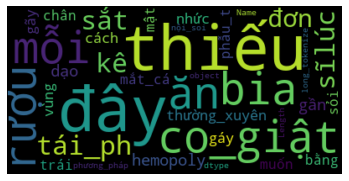

In [ ]:
from wordcloud import WordCloud 

# Start with one review:
text = df_train.long_tokenize

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(str(text))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Models

In [ ]:
df_train

,short_question,long_question,answer,link,long_tokenize,answer_tokenize
0,thường xuyên co giật sau khi sử dụng rượu bia ...,chào bác sĩ em năm nay 25 tuổi em bị co giật...,chào em rượu là một chất kích thích tác động t...,https://www.vinmec.com/vi/tin-tuc/hoi-dap-bac-...,"[25, co_giật, mỗi, bia, rượu, 2, 3, ăn, tái_ph...","[rượu, chất, kích_thích, tác_động, trực_tiếp, ..."
1,dùng thuốc điều trị thiếu máu do thiếu sắt như...,chào bác sĩlúc trước em bị thiếu máu thiếu sắt...,được giải đáp bởi tiến sĩ bác sĩ trương ngọc h...,https://www.vinmec.com/vi/tin-tuc/hoi-dap-bac-...,"[sĩlúc, thiếu, thiếu, sắt, kê, đơn, hemopoly, ...","[giải_đáp, tiến_sĩ, trương, ngọc, hải, hồi_sức..."
2,thường xuyên đau nhức vùng gáy là biểu hiện củ...,chào bác sĩ dạo gần đây em thường xuyên bị đau...,chào em đau vùng sau gáy không sưng đỏ không đ...,https://www.vinmec.com/vi/tin-tuc/hoi-dap-bac-...,"[dạo, gần, đây, thường_xuyên, nhức, vùng, gáy,...","[vùng, gáy, sưng, đỏ, liên_tục, từng, đợt, một..."
3,đã tháo bột điều trị gãy mắt cá ngoài chân 1 t...,chào bác sĩ cách đây 2 tháng em bị gãy mắt cá ...,chào bạn gãy mắt cá chân là một loại tổn thươn...,https://www.vinmec.com/vi/tin-tuc/hoi-dap-bac-...,"[cách, đây, 2, gãy, mắt_cá, chân, trái, phẫu_t...","[gãy, mắt_cá, chân, tổn_thương, xương, mức_độ,..."
4,hỏi đáp điều trị sỏi mật bằng phương pháp nội ...,chào bác sĩ tôi muốn hỏi điều trị sỏi mật bằng...,chào bạn điều trị sỏi mật bằng phương pháp nội...,https://www.vinmec.com/vi/tin-tuc/hoi-dap-bac-...,"[muốn, sỏi, mật, bằng, phương_pháp, nội_soi, ố...","[sỏi, mật, bằng, phương_pháp, nội_soi, ống, mề..."
...,...,...,...,...,...,...
8196,none,tôi vừa chích ngừa vaccine covid19 thì 10 ngày...,chào chị theo khuyến cáo của tổ chức y tế thế ...,https://vnexpress.net/tu-van-tiem-vaccine-covi...,,
8197,none,tôi bị nhịp xoang chậm khoảng 6 tháng đến một ...,chào chị với tiền sử bệnh lý về tim mạch chị v...,https://vnexpress.net/tu-van-tiem-vaccine-covi...,,
8198,none,vnvc đã có vaccine pfizer hay moderna chưa ạ,chào anh chị theo thông tin từ bộ y tế hơn 900...,https://vnexpress.net/tu-van-tiem-vaccine-covi...,,
8199,none,tôi bị bệnh hen suyễn hiện đang phải uống thuố...,chào anhchịanhchị có tiền sử hen phế quản đang...,https://vnexpress.net/tu-van-tiem-vaccine-covi...,,


## BM25

In [ ]:
!pip install rank_bm25

In [ ]:
from rank_bm25 import BM25Okapi
import numpy as np
# fit
bm25_index = BM25Okapi(df_train.long_tokenize)

# def search(search_string, num_results=10):
#     search_tokens = ViTokenizer.tokenize(search_string)
#     search_tokens = search_tokens.split()
#     scores = bm25_index.get_scores(search_tokens)
#     top_indexes = np.argsort(scores)[::-1][:num_results]
#     return top_indexes

# indexes = search('mất khứu giác sau gãy sống mũi vỡ xương trán có ngửi lại được không')
# indexes

In [ ]:
val = pd.read_csv('/content/val.csv')
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [ ]:
train = train[train.answer!='none']
train = train[train.answer!='']
train = train[train.answer!='None']
train = train[train.answer!=' ']
train = train[train.answer !=' tới vinmec. ']
train = train[train.answer !='.cảm ơn bạn đã tin tưởng và chia sẻ những lo lắng tới vinmec. được giải đáp bởi bác sĩ chuyên khoa ii phạm tiến ngọc - bác sĩ cấp cứu - khoa hồi sức cấp cứu - bệnh viện đa khoa quốc tế vinmec central park']
train = train[train.answer !=' tới hệ thống y tế vinmec. ']
train = train[train.answer !='cảm ơn bạn đã đặt câu hỏi tới hệ thống y tế vinmec. ']
train = train[train.answer !='rất mong có thể gặp bạn tại vinmec để có những trao đổi chuyên sâu. ']
train = train[train.answer !='rất mong có thể gặp gia đình bạn tại vinmec để có những trao đổi chuyên sâu. ']
train = train[train.answer !=' chúc bé luôn có sức khỏe tốt.']
train = train[train.question!='none']
train = train[train.question!='']
train = train[train.question!='None']
train = train[train.question!=' ']
train = train[train.question!='nan']
train = train[train.question!=' chúc bé nhà bạn luôn có sức khỏe tốt']
train = train[train.question!=' tới vinmec']
train = train[train.question!=' chúc bạn có một thai kỳ khỏe mạnh']
train.dropna(inplace=True)

In [ ]:
val = val[val.answer!='none']
val = val[val.answer!='']
val = val[val.answer!='None']
val = val[val.answer!=' ']
val = val[val.answer !=' tới vinmec. ']
val = val[val.answer !='.cảm ơn bạn đã tin tưởng và chia sẻ những lo lắng tới vinmec. được giải đáp bởi bác sĩ chuyên khoa ii phạm tiến ngọc - bác sĩ cấp cứu - khoa hồi sức cấp cứu - bệnh viện đa khoa quốc tế vinmec central park']
val = val[val.answer !=' tới hệ thống y tế vinmec. ']
val = val[val.answer !='cảm ơn bạn đã đặt câu hỏi tới hệ thống y tế vinmec. ']
val = val[val.answer !='rất mong có thể gặp bạn tại vinmec để có những trao đổi chuyên sâu. ']
val = val[val.answer !='rất mong có thể gặp gia đình bạn tại vinmec để có những trao đổi chuyên sâu. ']
val = val[val.answer !=' chúc bé luôn có sức khỏe tốt.']
val = val[val.question!='none']
val = val[val.question!='']
val = val[val.question!='None']
val = val[val.question!=' ']
val = val[val.question!='nan']
val = val[val.question!=' chúc bé nhà bạn luôn có sức khỏe tốt']
val = val[val.question!=' tới vinmec']
val = val[val.question!=' chúc bạn có một thai kỳ khỏe mạnh']
val.dropna(inplace=True)

In [ ]:
test = test[test.answer!='none']
test = test[test.answer!='']
test = test[test.answer!='None']
test = test[test.answer!=' ']
test = test[test.answer !=' tới vinmec. ']
test = test[test.answer !='.cảm ơn bạn đã tin tưởng và chia sẻ những lo lắng tới vinmec. được giải đáp bởi bác sĩ chuyên khoa ii phạm tiến ngọc - bác sĩ cấp cứu - khoa hồi sức cấp cứu - bệnh viện đa khoa quốc tế vinmec central park']
test = test[test.answer !=' tới hệ thống y tế vinmec. ']
test = test[test.answer !='cảm ơn bạn đã đặt câu hỏi tới hệ thống y tế vinmec. ']
test = test[test.answer !='rất mong có thể gặp bạn tại vinmec để có những trao đổi chuyên sâu. ']
test = test[test.answer !='rất mong có thể gặp gia đình bạn tại vinmec để có những trao đổi chuyên sâu. ']
test = test[test.answer !=' chúc bé luôn có sức khỏe tốt.']
test = test[test.question!='none']
test = test[test.question!='']
test = test[test.question!='None']
test = test[test.question!=' ']
test = test[test.question!='nan']
test = test[test.question!=' chúc bé nhà bạn luôn có sức khỏe tốt']
test = test[test.question!=' tới vinmec']
test = test[test.question!=' chúc bạn có một thai kỳ khỏe mạnh']
test.dropna(inplace=True)

In [ ]:
train = train.reset_index(drop=True)
val = val.reset_index(drop=True)
test = test.reset_index(drop=True)

In [ ]:
from pyvi import ViTokenizer
# train
train["long_tokenize"] = ""
train["answer_tokenize"] = ""
for i in range(len(train["question"])):
  try:
    train["long_tokenize"][i] = ViTokenizer.tokenize(str(train["question"][i]))
  except:
    print('..')
for i in range(len(train["answer"])):
  try:
    train["answer_tokenize"][i] = ViTokenizer.tokenize(str(train["answer"][i]))
  except:
    print('..')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [ ]:
from pyvi import ViTokenizer
# val
val["long_tokenize"] = ""
val["answer_tokenize"] = ""
for i in range(len(val["question"])):
  try:
    val["long_tokenize"][i] = ViTokenizer.tokenize(str(val["question"][i]))
  except:
    print('..')
for i in range(len(val["answer"])):
  try:
    val["answer_tokenize"][i] = ViTokenizer.tokenize(str(val["answer"][i]))
  except:
    print('..')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [ ]:
from pyvi import ViTokenizer
# test
test["long_tokenize"] = ""
test["answer_tokenize"] = ""
for i in range(len(test["question"])):
  try:
    test["long_tokenize"][i] = ViTokenizer.tokenize(str(test["question"][i]))
  except:
    print('..')
for i in range(len(test["answer"])):
  try:
    test["answer_tokenize"][i] = ViTokenizer.tokenize(str(test["answer"][i]))
  except:
    print('..')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [ ]:
corpus = val['answer_tokenize'].tolist()

In [ ]:
tokenized_corpus = [doc.split(" ") for doc in corpus]

bm25 = BM25Okapi(tokenized_corpus)

In [ ]:
def Bm25_k(k, data, corpus):
  topK = []
  count = 0
  for i in range(len(data['long_tokenize'])):
    tokenized_query = data['long_tokenize'][i].split(" ")
    doc_scores = bm25.get_scores(tokenized_query)
    topK = bm25.get_top_n(tokenized_query, corpus, n=k)
    for j in topK:
      if data['answer_tokenize'][i] == j:
        count += 1
        break
  return count

In [ ]:
print("Val:")
for i in range(1,11):
  print('K = ', i, '->', Bm25_k(i)/len(val))

Val:
K =  1 -> 0.47150259067357514
K =  2 -> 0.5544041450777202
K =  3 -> 0.5889464594127807
K =  4 -> 0.6234887737478411
K =  5 -> 0.646804835924007
K =  6 -> 0.6666666666666666
K =  7 -> 0.6848013816925734
K =  8 -> 0.6917098445595855
K =  9 -> 0.7003454231433506
K =  10 -> 0.7081174438687392


In [ ]:
len(test['long_tokenize'])

1171

In [ ]:
print("Test:")
for i in range(1,11):
  print('K = ', i, '->', Bm25_k_test(i)/len(test))

Test:
K =  1 -> 0.46883005977796754
K =  2 -> 0.4961571306575576
K =  3 -> 0.5704526046114432
K =  4 -> 0.5841161400512382
K =  5 -> 0.6242527754056362
K =  6 -> 0.6396242527754057
K =  7 -> 0.6549957301451751
K =  8 -> 0.6635354397950469
K =  9 -> 0.677198975234842
K =  10 -> 0.6806148590947908
